In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
spain = pd.read_csv('spain_summer_songs.csv')
rest = pd.read_csv('all_popular_csv.csv')

In [3]:
spain.head()
spain_feat = spain[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]
rest_feat = rest[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]

In [4]:
spain_feat.mean()

danceability      0.741125
energy            0.829875
key               5.562500
loudness         -6.492344
mode              0.781250
speechiness       0.082825
liveness          0.162247
valence           0.832781
tempo           126.473844
dtype: float64

In [5]:
spain_feat['key'].mode()

0    11
Name: key, dtype: int64

In [6]:
rest_feat['key'].mode()

0    1
Name: key, dtype: int64

In [7]:
### Tukey Post Hoc Test
### https://www.statology.org/tukey-test-python/

danceability


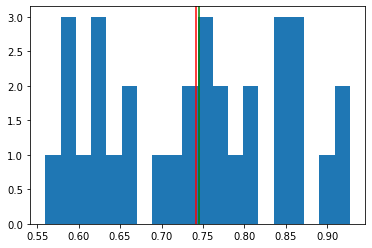

energy


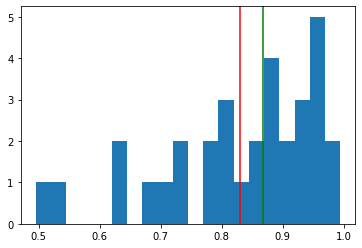

key


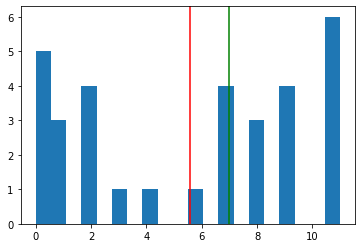

loudness


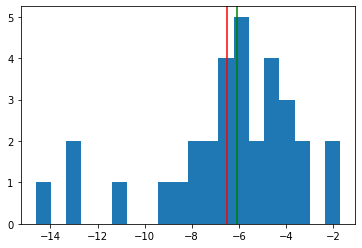

mode


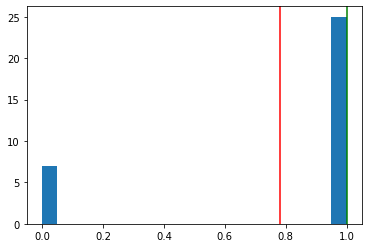

speechiness


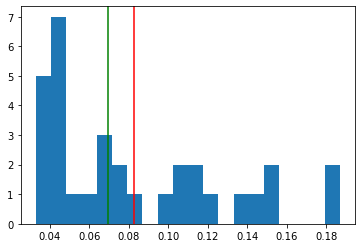

liveness


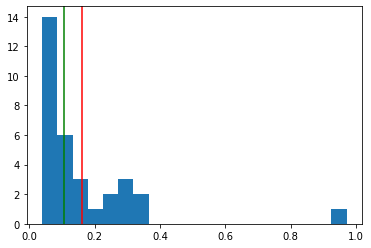

valence


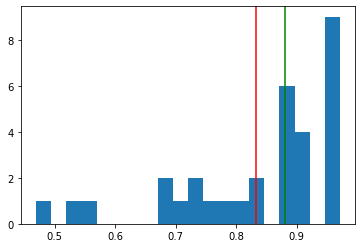

tempo


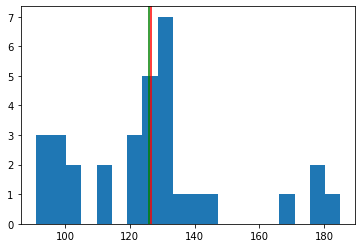

In [9]:
list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']
spain_feat

for feat in list:
    print(feat)
    plt.axvline(x=spain_feat[feat].mean(), color='r', linestyle='-')
    plt.axvline(x=spain_feat[feat].median(), color='g', linestyle='-')
    plt.hist(spain_feat[feat], bins=20)
    plt.show()

In [10]:
# danceability, energy, loudness, liveness, valence, tempo

#H0 : mu of features spain = mu of features popular
#H1 : mu of features spain != mu of features popular

alpha = 0.05

list = ['danceability', 'energy', 'loudness', 'liveness', 'mode', 'valence', 'tempo']
for feat in list:
    print(feat)
    _, p_value = st.ttest_ind(spain_feat[feat], rest_feat[feat], equal_var=False)
    print(_, p_value)
    print(p_value<alpha, '\n')

danceability
4.435866098459822 7.157313403127343e-05
True 

energy
6.199793395856607 2.5885858879437507e-07
True 

loudness
0.07479082040970564 0.9408167985279403
False 

liveness
-0.4117073266866171 0.6831537675712909
False 

mode
2.0394765421743766 0.048558637731806194
True 

valence
10.83144823409055 2.913488003841558e-14
True 

tempo
1.5927643257237205 0.11987729896797804
False 



In [11]:
rest_feat['valence'][3]

0.722

In [12]:
## Confidence interval

conf_intervals = pd.DataFrame(columns=['trait', 'bottom', 'top'])


traits = ['danceability', 'energy', 'loudness', 'liveness', 'mode', 'valence', 'tempo']
n= len(spain_feat)

cibot = []
citop = []
for feat in traits:
    mean_ = spain_feat[feat].mean()
    s = spain_feat[feat].std(ddof=0)
    print(feat)
    cibot.append(st.norm.interval(0.95, loc=mean_, scale=s/np.sqrt(n))[0])
    citop.append(st.norm.interval(0.95, loc=mean_, scale=s/np.sqrt(n))[1])
print(citop)
print(cibot)

conf_intervals['trait'] = traits
conf_intervals['bottom'] = cibot
conf_intervals['top'] = citop

conf_intervals


danceability
energy
loudness
liveness
mode
valence
tempo
[0.7782801797502868, 0.8739534069249884, -5.4469988978542085, 0.22214699667020965, 0.9244826898547887, 0.8787460500560335, 134.81486842443496]
[0.7039698202497134, 0.7857965930750119, -7.537688602145791, 0.10234675332979039, 0.6380173101452113, 0.7868164499439664, 118.13281907556507]


,trait,bottom,top
0,danceability,0.703970,0.778280
1,energy,0.785797,0.873953
2,loudness,-7.537689,-5.446999
3,liveness,0.102347,0.222147
4,mode,0.638017,0.924483
5,valence,0.786816,0.878746
6,tempo,118.132819,134.814868


In [13]:
rest.head(1)

,artist_name,track_name,album_name,release_date,artist_popularity,track_popularity,artist_genres,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Harry Styles,As It Was,As It Was,2022-03-31,92,97,['pop'],0.52,0.731,6,...,0.311,0.662,173.93,audio_features,4LRPiXqCikLlN15c3yImP7,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4


In [14]:
rest.loc[[1]]

,artist_name,track_name,album_name,release_date,artist_popularity,track_popularity,artist_genres,danceability,energy,key,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,Hounds of Love (2018 Remaster),1985-09-16,82,91,"['art pop', 'art rock', 'baroque pop', 'new wa...",0.625,0.533,10,...,0.0546,0.139,108.296,audio_features,29d0nY7TzCoi22XBqDQkiP,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840,4


In [ ]:
traits = ['danceability', 'energy', 'loudness', 'liveness', 'valence', 'tempo']

song = rest.loc[[1]]
conf_intervals
hit_score = 0

def hit_detector(song):
    for trait in range(len(traits)):
        if (rest[traits[trait]][trait] > conf_intervals['bottom'][traits.index(trait)])&(rest[traits[trait]][trait] < conf_intervals['top'][traits.index(trait)]):
            hit_score += 1
            print(hit_score)
        else:
            print('hello')

hit_detector(song)


In [ ]:
rest[rest[rest['id'].value_counts() > 1]]

In [ ]:
# danceability, energy, valence, tempo

#H0 : mu of features spain decade = mu of features spain other decade
#H1 : mu of features spain != mu of features popular

alpha = 0.05

list = ['danceability', 'energy', 'loudness', 'liveness', 'mode', 'valence', 'tempo']
for feat in list:
    print(feat)
    _, p_value = st.ttest_ind(spain_feat[feat], rest_feat[feat], equal_var=False)
    print(_, p_value)
    print(p_value<alpha, '\n')

    